In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced


Using TensorFlow backend.


In [9]:
###  READ CLIMATE FEATURES IN 

temp = []

features = pd.DataFrame()
for year in range(1950,2019):
    for month in range(1,13):
        yrmo = year*100 + month
        temp.append(yrmo)
        
features['yearmo'] = temp


with open("data/file_list","r") as F:
    for file in F:
        file = file.rstrip("\n")
        spl = file.split(".")
        name = spl[0]
        temp = []
        with open(f"data/{file}","r") as fin:
            line=fin.readline()
            spl = line.split()
            start = int(spl[0])
            end = int(spl[1])
            for nn in range(start,end):
               line = fin.readline()
               spl = line.split()
               year = int(spl[0])
               if (year >= 1950 and year <= 2018):
                  for val in spl[1:]:
                    if float(val) != -99.99:
                      temp.append(val)
            if len(temp) == 828:
                features[name] = temp
                features[name] = features[name].astype('float')
print (features.head())  

#for col1 in features :
#    for col2 in features:
#       print (col1,col2,features[col1].corr(features[col2]))
#for col in features:
#    if col != 'DATE':
#        features.plot.scatter('yearmo',col)


   yearmo  ammsst  ammwind   amon   epo  nina1  nina3  nina34  nina4   oni  \
0  195001    0.53     1.10  0.111  0.91  23.01  23.56   24.55  26.94 -1.53   
1  195002   -1.07    -5.12 -0.033 -1.13  24.32  24.89   25.06  26.67 -1.34   
2  195003   -1.26    -0.42 -0.105 -0.02  25.11  26.36   25.87  26.52 -1.16   
3  195004    0.72     1.67 -0.130 -1.87  23.63  26.44   26.28  26.90 -1.18   
4  195005    1.05     4.21 -0.058 -0.98  22.68  25.69   26.18  27.73 -1.07   

    pna    qbo   tna    tni   tsa  whwp    wp  
0 -3.65  -8.99 -0.14  0.624  0.08 -0.17 -1.69  
1 -1.69 -11.37 -0.36  0.445  0.15 -0.30 -1.36  
2 -0.06 -10.63 -0.37  0.382  0.12 -0.96 -0.38  
3 -0.23  -8.19 -0.11  0.311 -0.17 -1.93 -0.50  
4 -0.40  -6.09 -0.25  0.124 -0.34 -2.27  0.23  
yearmo yearmo 1.0
yearmo ammsst 0.041773644757522106
yearmo ammwind -0.08155938753343783
yearmo amon 0.23365467418715186
yearmo epo -0.0009038439804518073
yearmo nina1 0.11752826780726361
yearmo nina3 0.161235830848823
yearmo nina34 0.15444717

In [12]:
temp = pd.read_csv("data/denver.csv")
denver = temp.drop(columns=["STATION","NAME"])

for col in denver:
    if col != "DATE":
        denver[col] = denver[col].astype('float')
count=1
for row in denver.iterrows():
    yr = 1950 + int((count-1)/12)
    count+=1
    yy = int(row[1]['DATE'][0:4])
    if (yy != yr):
       print (yr,yy,row[1]['DATE'],row[1][2])
    
#print (denver)
features['DENVER_PRCP'] = denver['PRCP']
features['DENVER_TAVG'] = denver['TAVG']
print (features.head())

for col1 in features :
    for col2 in features:
       print (col1,col2,features[col1].corr(features[col2]))

   yearmo  ammsst  ammwind   amon   epo  nina1  nina3  nina34  nina4   oni  \
0  195001    0.53     1.10  0.111  0.91  23.01  23.56   24.55  26.94 -1.53   
1  195002   -1.07    -5.12 -0.033 -1.13  24.32  24.89   25.06  26.67 -1.34   
2  195003   -1.26    -0.42 -0.105 -0.02  25.11  26.36   25.87  26.52 -1.16   
3  195004    0.72     1.67 -0.130 -1.87  23.63  26.44   26.28  26.90 -1.18   
4  195005    1.05     4.21 -0.058 -0.98  22.68  25.69   26.18  27.73 -1.07   

    pna    qbo   tna    tni   tsa  whwp    wp  DENVER_PRCP  DENVER_TAVG  
0 -3.65  -8.99 -0.14  0.624  0.08 -0.17 -1.69         0.47         29.4  
1 -1.69 -11.37 -0.36  0.445  0.15 -0.30 -1.36         0.20         38.6  
2 -0.06 -10.63 -0.37  0.382  0.12 -0.96 -0.38         0.31         38.1  
3 -0.23  -8.19 -0.11  0.311 -0.17 -1.93 -0.50         2.98         47.6  
4 -0.40  -6.09 -0.25  0.124 -0.34 -2.27  0.23         2.80         53.0  
yearmo yearmo 1.0
yearmo ammsst 0.041773644757522106
yearmo ammwind -0.0815593875334378

PRCP
TAVG
TMAX
TMIN
      DATE   PRCP  TAVG  TMAX  TMIN  month  PRCPCAT  TAVGCAT
0  1950-01   6.79  76.8  84.4  69.2      1        0        0
1  1950-02  16.89  75.2  81.3  69.0      2        1       -1
2  1950-03   6.42  74.9  81.4  68.5      3        0        0
3  1950-04   3.04  70.2  77.3  63.2      4        0        1
4  1950-05   1.23  64.8  74.1  55.5      5        0        1


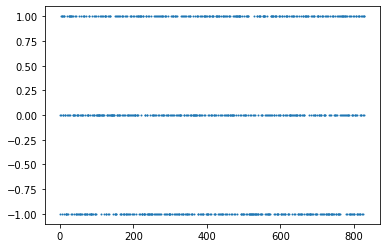

In [34]:
### GET OBSERVATIONS FOR DENVER AND BRISBANE
temp = pd.read_csv("data/denver.csv")
denver = temp.drop(columns=["STATION","NAME"])

for col in denver:
    if col != "DATE":
        denver[col] = denver[col].astype('float')
count=1
for row in denver.iterrows():
    yr = 1950 + int((count-1)/12)
    count+=1
    yy = int(row[1]['DATE'][0:4])
    if (yy != yr):
       print (yr,yy,row[1]['DATE'],row[1][2])
    
    
temp = pd.read_csv("data/brisbane.csv")
brisbane_stats = {}
brisbane = temp.drop(columns=["STATION","NAME"])
        
count=1
temp = []
for row in brisbane.iterrows():
    yr = 1950 + int((count-1)/12)
    count+=1
    yy = int(row[1]['DATE'][0:4])
    mm = int(row[1]['DATE'][5:7])
    temp.append(mm)
    if (yy != yr):
       print (yr,yy,row[1]['DATE'],row[1][2])
    
brisbane['month'] = temp
for col in brisbane:
    if col != 'DATE' and col != 'month':
       print (col)
       brisbane_stats[col] = {}
       for month in range(1,13):
          brisbane_stats[col][str(month)] = {}
          brisbane_stats[col][str(month)]['mean'] = brisbane[brisbane["month"] == month][col].mean() 
          brisbane_stats[col][str(month)]['std'] = brisbane[brisbane["month"] == month][col].std()
         
        
        
    
            
            
def getCat(val,mean,std):

   if val > (mean+std):
        return 1
   elif val < (mean-std):
        return -1
   else:
        return 0
pcpcat = []
tavgcat = []
import random

for row in brisbane.iterrows():
    month = str(row[1]['month'])
    pcpcat.append(getCat(row[1]['PRCP'],brisbane_stats['PRCP'][month]['mean'],brisbane_stats['PRCP'][month]['std']))
#    tavgcat.append(getCat(row[1]['TAVG'],brisbane_stats['TAVG'][month]['mean'],brisbane_stats['TAVG'][month]['std']))
    tavgcat.append(random.randint(-1,1))

brisbane['PRCPCAT'] = pcpcat
brisbane['TAVGCAT'] = tavgcat

print (brisbane.head())

xx = [m for  m in range(1,829)]
plt.scatter(xx,brisbane['TAVGCAT'],s=1)

In [10]:
col_hld = features.columns
df = features[['nina3','nina4']].values
print (df)
print(col_hld)

[[23.56 26.94]
 [24.89 26.67]
 [26.36 26.52]
 ...
 [25.73 29.71]
 [26.   29.61]
 [26.14 29.45]]
Index(['yearmo', 'ammsst', 'ammwind', 'amon', 'epo', 'nina1', 'nina3',
       'nina34', 'nina4', 'oni', 'pna', 'qbo', 'tna', 'tni', 'tsa', 'whwp',
       'wp'],
      dtype='object')


In [23]:
### NEURAL NETWORK



X = features[['wp','pna']].values
print (X)

y = brisbane['TAVGCAT'].values.reshape(-1,1)
y_binary = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

[[-1.69 -3.65]
 [-1.36 -1.69]
 [-0.38 -0.06]
 ...
 [-1.14  0.39]
 [-0.61  0.22]
 [ 0.11  0.56]]
Epoch 1/100
 - 0s - loss: 0.6491 - acc: 0.6667
Epoch 2/100
 - 0s - loss: 0.6435 - acc: 0.6747
Epoch 3/100
 - 0s - loss: 0.6406 - acc: 0.6812
Epoch 4/100
 - 0s - loss: 0.6380 - acc: 0.6828
Epoch 5/100
 - 0s - loss: 0.6362 - acc: 0.6828
Epoch 6/100
 - 0s - loss: 0.6349 - acc: 0.6828
Epoch 7/100
 - 0s - loss: 0.6339 - acc: 0.6828
Epoch 8/100
 - 0s - loss: 0.6327 - acc: 0.6828
Epoch 9/100
 - 0s - loss: 0.6316 - acc: 0.6828
Epoch 10/100
 - 0s - loss: 0.6309 - acc: 0.6828
Epoch 11/100
 - 0s - loss: 0.6304 - acc: 0.6828
Epoch 12/100
 - 0s - loss: 0.6297 - acc: 0.6828
Epoch 13/100
 - 0s - loss: 0.6292 - acc: 0.6828
Epoch 14/100
 - 0s - loss: 0.6289 - acc: 0.6828
Epoch 15/100
 - 0s - loss: 0.6284 - acc: 0.6828
Epoch 16/100
 - 0s - loss: 0.6283 - acc: 0.6828
Epoch 17/100
 - 0s - loss: 0.6276 - acc: 0.6828
Epoch 18/100
 - 0s - loss: 0.6276 - acc: 0.6828
Epoch 19/100
 - 0s - loss: 0.6270 - acc: 0.6828
E

In [ ]:
### LOGISTIC REGRESSION


y = brisbane['TAVGCAT'].values.reshape(-1,1)
print (len(X),len(y))

# -------------------------------------------------------------

def regLogistic(X,y):
    print (y[0:10],X[0:10])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    print(f"Training Data Score: {classifier.score(X_train, y_train)}")
    print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
   

def phaseShiftLogReg(X,y,nphases):
    tempx = X
    tempy = y
    for nn in range(0,nphases):
        tempy = np.delete(tempy,0,0)
        tempx = np.delete(tempx,-1,0)
       
        regLogistic(tempx,tempy)
        
        
for col in features:
   print (col,col,col,col,col)
   x1 = features[col].values.reshape(-1,1)
  
   print (x1)
   y = brisbane['TAVGCAT'].values.reshape(-1,1)
   print(col)
   phaseShiftLogReg(X,y,2)


In [ ]:
####  LINEAR REGRESSION


X = []
X = features['nina4'].values.reshape(-1,1)


y = brisbane['TAVG'].values.reshape(-1,1)
print (len(X),len(y))


# ---------------------------------------------------------

def linearReg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)
    model = LinearRegression()

    model.fit(X_train, y_train)

    predicted = model.predict(X_test)

    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)

 #   print(f"Mean Squared Error (MSE): {mse}")
  #  print(f"R-squared (R2 ): {r2}")
    print(r2,model.score(X_test, y_test))
    




def phaseShift(X,y,nphases):
    tempx = X
    tempy = y
    for nn in range(0,nphases):
        tempy = np.delete(tempy,0,0)
        tempx = np.delete(tempx,-1,0)
        linearReg(tempx,tempy)
        
for col in features:
   print (col,col,col,col,col)
   X = features[col].values.reshape(-1,1)
   phaseShift(X,y,18)

In [ ]:


X, y = make_blobs(n_samples=200,centers=2, cluster_std=3,random_state=42)
#print (X)
#print (y)

plt.scatter(X[:, 0], X[:, 1], c=y)




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


In [ ]:
iris = load_iris()
print (type(iris))

print (iris)
#df = pd.read_csv("diabetes.csv")
#data = df.drop("Outcome", axis=1)
#print (df.Outcome)
X, y = make_imbalance(iris.data, iris.target,
                      sampling_strategy={0: 25, 1: 50, 2: 50},
                      random_state=42)

df = pd.DataFrame(X)
df.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
print (df.head())

df.plot.scatter('SepalLength','SepalWidth',color=y)
#plt.scatter(X,y)